In [ ]:
import pandas as pd 

#load training data
training_set = pd.read_csv('training_audit_data.csv')

#load audit data
test_set = pd.read_csv('test_audit_data-1.csv')

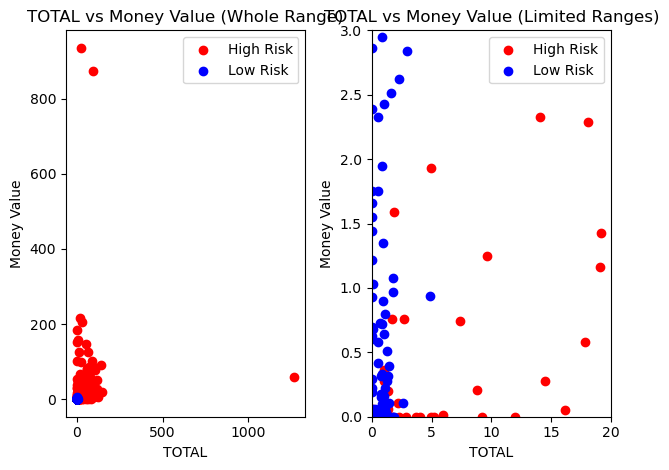

In [16]:
import matplotlib.pyplot as plt

# separate data into high and low risk groups
high_risk = training_set[training_set['Risk']==1]
low_risk = training_set[training_set['Risk']==0]

# plot the first scatter plot with the whole range of values
plt.subplot(121)
plt.scatter(high_risk['TOTAL'], high_risk['Money_Value'], color='red', label='High Risk')
plt.scatter(low_risk['TOTAL'], low_risk['Money_Value'], color='blue', label='Low Risk')
plt.xlabel('TOTAL')
plt.ylabel('Money Value')
plt.title('TOTAL vs Money Value (Whole Range)')
plt.legend()

# plot the second scatter plot with limited ranges
plt.subplot(122)
plt.scatter(high_risk['TOTAL'], high_risk['Money_Value'], color='red', label='High Risk')
plt.scatter(low_risk['TOTAL'], low_risk['Money_Value'], color='blue', label='Low Risk')
plt.xlabel('TOTAL')
plt.ylabel('Money Value')
plt.title('TOTAL vs Money Value (Limited Ranges)')
plt.xlim(0, 20)
plt.ylim(0, 3)
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler object
scaler = StandardScaler()

#Normalise training set
normalized_training_set = scaler.fit_transform(training_set.iloc[:, :-1])

#Normalise test set
normalized_test_set = scaler.transform(test_set.iloc[:, :-1])


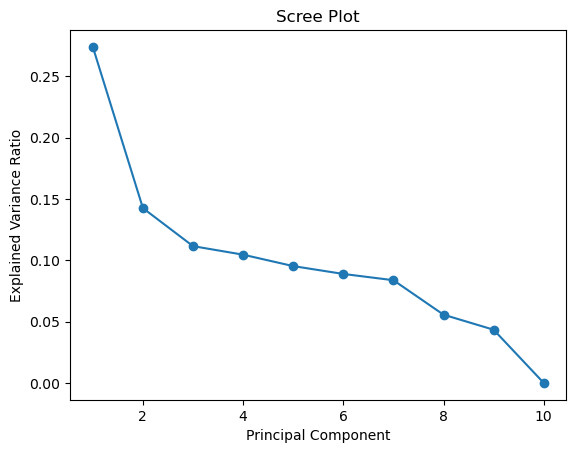

In [18]:
from sklearn.decomposition import PCA

# Perform PCA on the scaled training set
pca = PCA().fit(normalized_training_set)

# Get the explained variance ratio of each principal component
variance_ratio = pca.explained_variance_ratio_

# Create a scree plot
import matplotlib.pyplot as plt

plt.plot(range(1, len(variance_ratio)+1), variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

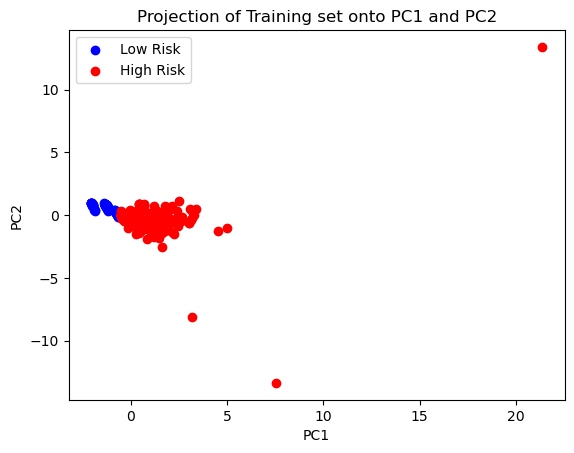

In [19]:
import matplotlib.pyplot as plt

# Perform PCA on the scaled training set and transform the data onto the PC1 and PC2 axes
pca = PCA(n_components=2).fit(normalized_training_set)
training_set_transformed = pca.transform(normalized_training_set)

# Plot the transformed data with different colors according to its class
plt.scatter(training_set_transformed[training_set['Risk'] == 0, 0], training_set_transformed[training_set['Risk'] == 0, 1], 
            color='b', label='Low Risk')
plt.scatter(training_set_transformed[training_set['Risk'] == 1, 0], training_set_transformed[training_set['Risk'] == 1, 1], 
            color='r', label='High Risk')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Training set onto PC1 and PC2')
plt.legend()
plt.show()

In [20]:
#Fit PCA on normalized training set
pca = PCA(n_components=2).fit(normalized_training_set)

#Project normalized test set on same PCA space as training set
projected_test_set = pca.transform(normalized_test_set)

In [21]:
from sklearn.model_selection import train_test_split

#Split the data into training set (II) and validation set
X_train, X_val, y_train, y_val = train_test_split(normalized_training_set, training_set['Risk'], test_size=0.25, random_state=42)

#Print the number of points in each set 
print(f"Number of points in training set (II): {len(X_train)}")
print(f"Number of points in validation set: {len(X_val)}")

Number of points in training set (II): 293
Number of points in validation set: 98


In [22]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler object using training set (II)
scaler = StandardScaler()
scaler.fit(X_train)

#Normalize both training set (II) and validation set using the scaler fitted on training set (II)
X_train_normalized = scaler.transform(X_train)
X_val_normalized = scaler.transform(X_val)

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Define parameter combinations
param_combinations = [ 
    {'kernel': 'rbf', 'C' : 1, 'gamma': 10},
    {'kernel': 'rbf', 'C' : 1, 'gamma': 0.5},
    {'kernel': 'rbf', 'C' : 5, 'gamma': 10},
    {'kernel': 'linear', 'C': 0.1}, 
]

#Train and test an SVM model for each combination of parameters
best_accuracy = 0
for params in param_combinations:
    #Train an SVM model
    svm = SVC(**params)
    svm.fit(X_train_normalized, y_train)
    
    #Test the SVM model on the validation set
    y_pred = svm.predict(X_val_normalized)
    
    #Computing accuracy score
    accuracy = accuracy_score(y_val, y_pred)
    
    #Print the accuracy of the SVM model
    print(f"Parameters: {params}, Accuracy: {accuracy}")
    
    #Update the best accuracy and best parameters
    if accuracy > best_accuracy: 
        best_accuracy = accuracy
        best_params = params
        
#Print the best parameters
print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy}")
    
    

Parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 10}, Accuracy: 0.9795918367346939
Parameters: {'kernel': 'rbf', 'C': 1, 'gamma': 0.5}, Accuracy: 0.9795918367346939
Parameters: {'kernel': 'rbf', 'C': 5, 'gamma': 10}, Accuracy: 0.9897959183673469
Parameters: {'kernel': 'linear', 'C': 0.1}, Accuracy: 0.9489795918367347
Best Parameters: {'kernel': 'rbf', 'C': 5, 'gamma': 10}, Best Accuracy: 0.9897959183673469


In [24]:
#Train an SVM model with the best parameters on the whole training set (I)
svm = SVC(**best_params)
svm.fit(normalized_training_set, training_set['Risk'])

#Use the SVM model to classify the normalised test set
y_pred = svm.predict(normalized_test_set)

#Compute the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(test_set['Risk'], y_pred)
print(conf_matrix)

[[ 78  14]
 [ 43 241]]


In [25]:
from sklearn.decomposition import PCA

# Create a PCA object with 2 components
pca = PCA(n_components=2)

# Fit PCA on normalized training set (I)
pca.fit(normalized_training_set)

# Apply PCA to normalized training set (I) and test set
X_train_reduced = pca.transform(normalized_training_set)
X_test_reduced = pca.transform(normalized_test_set)


In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Normalise the reduced training and test set
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

# Train SVM model on reduced training set
svm = SVC(**best_params)
svm.fit(X_train_reduced_scaled, training_set['Risk'])

# Test SVM model on reduced test set
y_pred = svm.predict(X_test_reduced_scaled)

# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_set['Risk'], y_pred)

# Print confusion matrix
print(cm)


[[ 92   0]
 [195  89]]
